In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
"""⨂ 자리에 적절한 값을 넣어 코드를 완성하시오"""

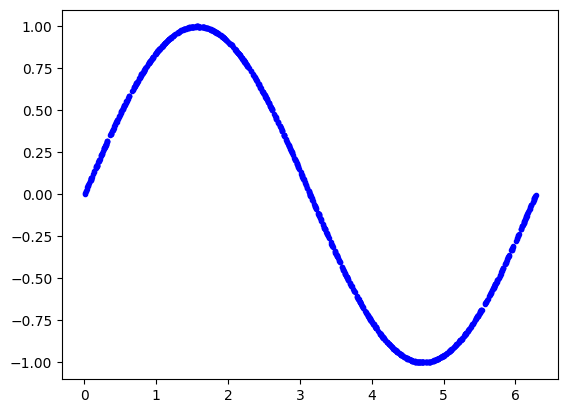

In [2]:
#네트워크 학습 및 훈련에 사용할 데이터 생성
SAMPLES = ⨂ #샘플 수 정하기
SEED = ⨂ #본인 학번
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random.uniform(low=⨂, high=⨂*math.pi, size=SAMPLES) #x값의 시작과 끝 정하기
np.random.shuffle(x_values)
y_values = np.sin(x_values)
plt.plot(x_values, y_values, 'b.')
plt.show()

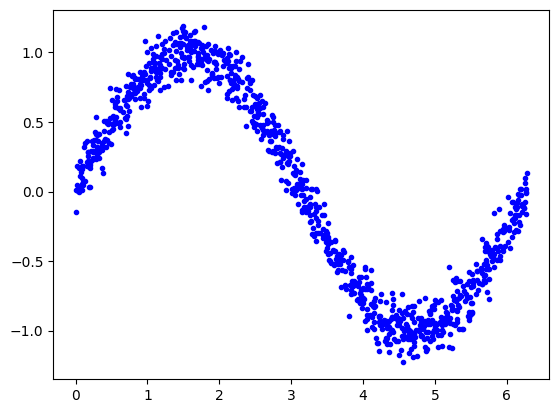

In [3]:
y_values += ⨂ * np.random.randn(*y_values.shape) #적절한 값을 대입해 노이즈 추가
plt.plot(x_values, y_values, 'b.')
plt.show()

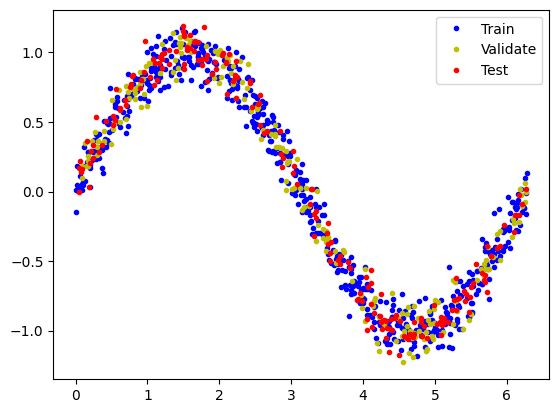

In [4]:
#데이터 분할
TRAIN_SPLIT = int(⨂ * SAMPLES) #학습 데이터 셋의 비율 정하기
TEST_SPLIT = int(⨂ * SAMPLES + TRAIN_SPLIT) #테스트 데이터 셋의 비율 정하기

x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

assert(x_train.size + x_validate.size + x_test.size) == SAMPLES 

plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

In [11]:
#모델 설계
model = tf.keras.Sequential()
model.add(layers.Dense(⨂, activation = 'relu', input_shape = (1,))) #뉴런 개수 정하기
model.add(layers.Dense(⨂, activation='relu')) #뉴런 개수 정하기
model.add(layers.Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [14]:
#모델 학습
history = model.fit(x_train,
                    y_train,
                    epochs=⨂, #에폭수 정하기
                    batch_size=⨂, # 배치사이즈 정하기
                    validation_data=(x_validate, y_validate))
#model.fit : 학습
#batch_size : 한번에 처리할 데이터 수
#history 객체 : 매 에폭의 학습 결과를 기록.

Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 0.1701 - mae: 0.3378 - val_loss: 0.1658 - val_mae: 0.3342
Epoch 2/20
150/150 [==============================] - 0s 986us/step - loss: 0.1680 - mae: 0.3371 - val_loss: 0.1661 - val_mae: 0.3318
Epoch 3/20
150/150 [==============================] - 0s 962us/step - loss: 0.1643 - mae: 0.3336 - val_loss: 0.1670 - val_mae: 0.3294
Epoch 4/20
150/150 [==============================] - 0s 1ms/step - loss: 0.1681 - mae: 0.3332 - val_loss: 0.1644 - val_mae: 0.3344
Epoch 5/20
150/150 [==============================] - 0s 987us/step - loss: 0.1684 - mae: 0.3350 - val_loss: 0.1635 - val_mae: 0.3301
Epoch 6/20
150/150 [==============================] - 0s 980us/step - loss: 0.1665 - mae: 0.3316 - val_loss: 0.1652 - val_mae: 0.3271
Epoch 7/20
150/150 [==============================] - 0s 990us/step - loss: 0.1680 - mae: 0.3316 - val_loss: 0.1658 - val_mae: 0.3350
Epoch 8/20
150/150 [==============================] - 0s 1ms/step 

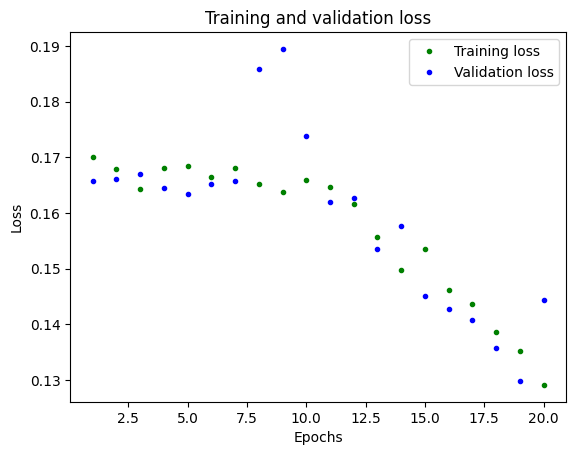

In [16]:
#학습 및 훈련에서 loss 변화
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

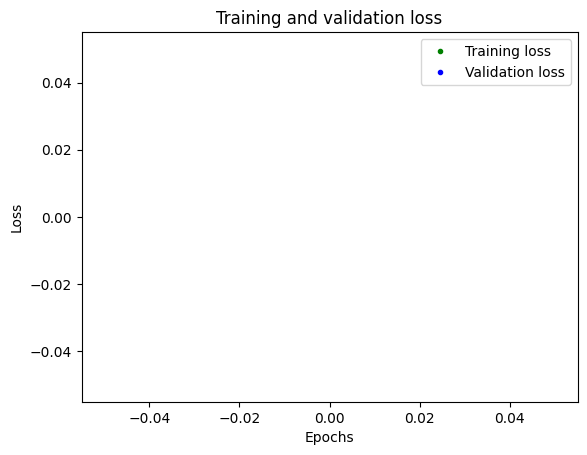

In [17]:
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label = 'Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

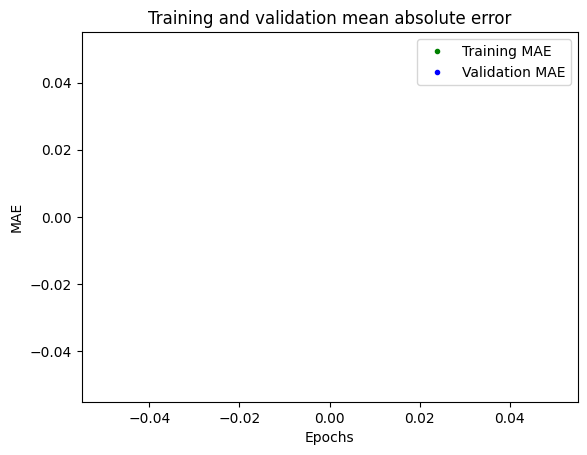

In [18]:
#에폭별로 mae값 비교
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label = 'Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label = 'Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

7/7 [==============================] - 0s 679us/step


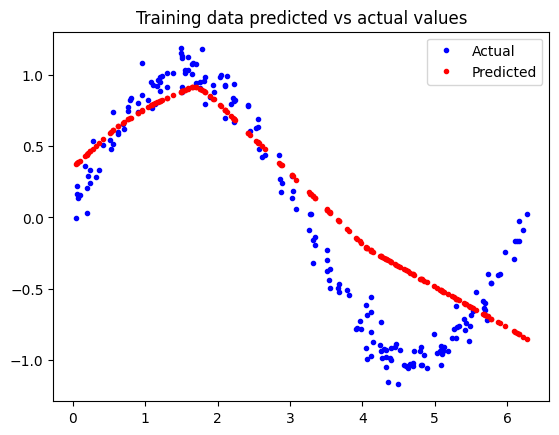

In [19]:
predictions = model.predict(x_test)
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label = 'Actual')
plt.plot(x_test, predictions, 'r.', label = 'Predicted')
plt.legend()
plt.show()

In [22]:
model.save('sin_v2.h5') #모델 저장. 이름은 상관없으나 .h5로 저장하기

In [23]:
#테스트 데이터 및 정답 데이터 저장
df_test = pd.DataFrame(x_test)
df_gt = pd.DataFrame(y_test)
df_test.to_csv("test_data.csv", index = False)
df_gt.to_csv("answer.csv", index=False)

7/7 [==============================] - 0s 667us/step


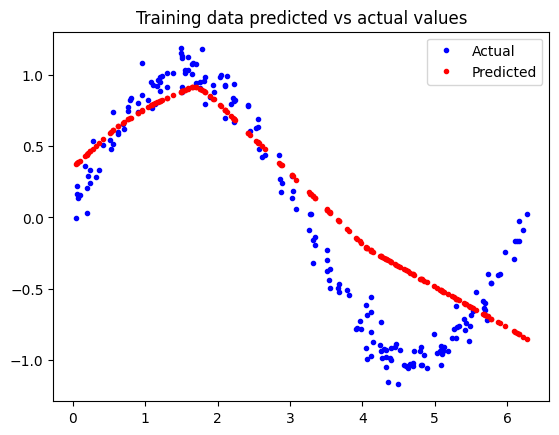

In [45]:
#데이터랑 모델 불러와서 테스트 하는거 확인
#저장이 잘 되었는지 확인 작업
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

test_data = pd.read_csv('test_data.csv')
answer_data = pd.read_csv('answer.csv')
test_data = test_data.to_numpy()
answer_data = answer_data.to_numpy()

from tensorflow import keras
model = keras.models.load_model('sin_v2.h5')

predictions = model.predict(test_data)
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(test_data, answer_data, 'b.', label = 'Actual')
plt.plot(test_data, predictions, 'r.', label = 'Predicted')
plt.legend()
plt.show()

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp3ghefbnp\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp3ghefbnp\assets
D:\Project\anaconda3\envs\lecture1\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


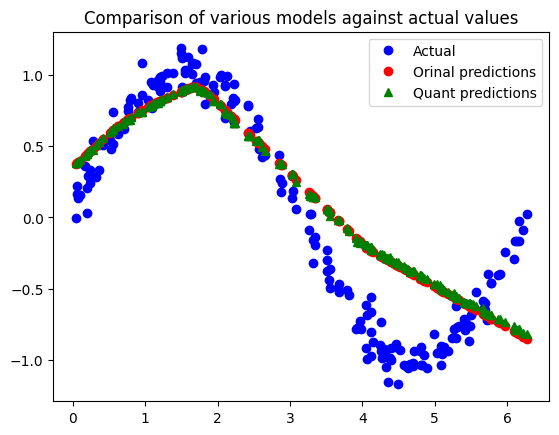

변환 전 :  33544
변환 후 :  3040


In [46]:
#모델을 라즈베리 파이 보드에 올려 돌리기 위해 양자화
converter = tf.lite.TFLiteConverter.from_keras_model(model) #Tensorflow Lite 모델로 변환 시작
converter.optimizations = [tf.lite.Optimize.DEFAULT] #양자화를 활성화하기 위한 설정

#양자화를 위한 대표 데이터셋을 제공. Tensorflow Lite의 양자화는 대표 데이터 셋을 사용해 훈련된 모델을 정수 연산으로 변환.
def representative_dataset_generator():
    for value in x_test:
        yield [np.array(value, dtype = np.float32, ndmin = 2)]

converter.representative_dataset = representative_dataset_generator #양자화에 사용할 데이터 지정
tflite_model = converter.convert() # 모델을 Tensorflow 모델로 변환.
open("sine_model_quantized.tflite", "wb").write(tflite_model) # 모델 저장

#양자화 한 모델 불러와서 테스트
model = tf.lite.Interpreter("sine_model_quantized.tflite")
model.allocate_tensors()
input_index = model.get_input_details()[0]["index"]
output_index = model.get_output_details()[0]["index"]
predict = []

for x_value in x_test:
    x_value_tensor = tf.convert_to_tensor([[x_value]], dtype = np.float32)
    model.set_tensor(input_index, x_value_tensor)
    model.invoke()
    predict.append(model.get_tensor(output_index)[0])

#predictions : 양자화 전 모델 테스트 결과
#predict : 양자화 된 모델 테스트 결과
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label = 'Actual')
plt.plot(x_test, predictions, 'ro', label = 'Orinal predictions')
plt.plot(x_test, predict, 'g^', label = 'Quant predictions')
plt.legend()
plt.show()


#변환 전, 후 저장한 모델의 크기 비교
import os
basic_model = os.path.getsize("sin_v2.h5")
print("변환 전 : ", basic_model)
trans_model = os.path.getsize("sine_model_quantized.tflite")
print("변환 후 : ", trans_model)